In [11]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout, Rescaling
from keras.utils import image_dataset_from_directory
from keras.models import Model, Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [12]:
train_data = image_dataset_from_directory("Data/Training/", batch_size=8, image_size=(224,224))

Found 47009 files belonging to 2 classes.


In [13]:
valid_data = image_dataset_from_directory("Data/Validation/", batch_size=8,image_size=(224,224))

Found 11649 files belonging to 2 classes.


In [44]:
train_data.class_names


['female', 'male']

Train data : 
tf.Tensor([0 0 0 1 0 0 1 1], shape=(8,), dtype=int32)


2023-03-14 20:06:34.755198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [47009]
	 [[{{node Placeholder/_4}}]]
2023-03-14 20:06:34.755641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [47009]
	 [[{{node Placeholder/_4}}]]


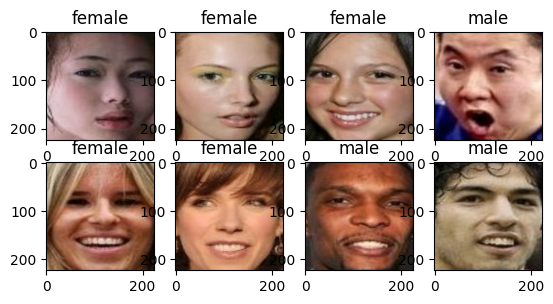

In [14]:
print("Train data : ")
CLASSES = train_data.class_names
for rasm,label in train_data.take(1):
    print(label)
    for i in range(8):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(rasm[i].numpy().astype("uint8"))
        plt.title(CLASSES[label[i]])
        
plt.show()

Validation data : 


2023-03-14 20:06:35.419418: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [11649]
	 [[{{node Placeholder/_0}}]]
2023-03-14 20:06:35.419665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [11649]
	 [[{{node Placeholder/_4}}]]


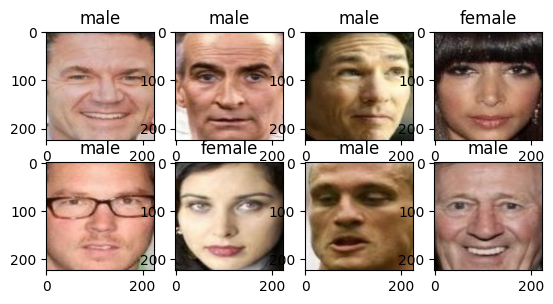

In [15]:
print("Validation data : ")
CLASSES = valid_data.class_names
for rasm,label in valid_data.take(1):
    for i in range(8):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(rasm[i].numpy().astype("uint8"))
        plt.title(CLASSES[label[i]])
        
plt.show()

### Create model

In [38]:
model_drop = Sequential([
    Rescaling(1./255),
    
    Conv2D(filters=4, kernel_size=(3,3), padding="same", activation="relu"), # 4 224 224
    BatchNormalization(), 
    MaxPool2D((2,2)), # 4 112 112 
    Dropout(0.2),
    
    Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"), # 8 112 112
    BatchNormalization(), 
    MaxPool2D((2,2)), # 18 56 56
    Dropout(0.2),
    
    Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"), # 16 56 56
    BatchNormalization(), 
    MaxPool2D((2,2)), # 16 28 28 
    Dropout(0.2),
    
    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"), # 32 56 56
    BatchNormalization(), 
    MaxPool2D((2,2)), # 132 28 28 
    Dropout(0.2),
    
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"), # 64 56 56
    BatchNormalization(), 
    MaxPool2D((2,2)), # 64 28 28 
    Dropout(0.2),
    
    Flatten(),
    
    
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(10, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(2, activation="sigmoid")       
])

In [39]:
model_drop.build(input_shape=(8,224,224,3))
model_drop.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (8, 224, 224, 3)          0         
                                                                 
 conv2d_30 (Conv2D)          (8, 224, 224, 4)          112       
                                                                 
 batch_normalization_42 (Bat  (8, 224, 224, 4)         16        
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPoolin  (8, 112, 112, 4)         0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (8, 112, 112, 4)          0         
                                                                 
 conv2d_31 (Conv2D)          (8, 112, 112, 8)         

In [40]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optim = tf.keras.optimizers.Adam()
model_drop.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

### Learning

In [41]:
model_drop.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
5877/5877 [==============================] - 470s 80ms/step - loss: 0.3632 - accuracy: 0.8493 - val_loss: 0.2152 - val_accuracy: 0.9244
Epoch 2/10
5877/5877 [==============================] - 468s 80ms/step - loss: 0.2674 - accuracy: 0.9018 - val_loss: 0.1530 - val_accuracy: 0.9480
Epoch 3/10
5877/5877 [==============================] - 481s 82ms/step - loss: 0.2536 - accuracy: 0.9101 - val_loss: 0.1666 - val_accuracy: 0.9372
Epoch 4/10
5877/5877 [==============================] - 475s 81ms/step - loss: 0.2371 - accuracy: 0.9194 - val_loss: 0.1780 - val_accuracy: 0.9424
Epoch 5/10
5877/5877 [==============================] - 487s 83ms/step - loss: 0.2181 - accuracy: 0.9268 - val_loss: 0.1580 - val_accuracy: 0.9519
Epoch 6/10
5877/5877 [==============================] - 540s 92ms/step - loss: 0.2050 - accuracy: 0.9342 - val_loss: 0.1982 - val_accuracy: 0.9524
Epoch 7/10
5877/5877 [==============================] - 574s 98ms/step - loss: 0.1985 - accuracy: 0.9374 - val_loss: 0

In [46]:
model_drop.save("model.h5")

In [43]:
model_drop.evaluate(valid_data)

1457/1457 [==============================] - 25s 17ms/step - loss: 0.1573 - accuracy: 0.9520


[0.1572519987821579, 0.9520130753517151]